# Chapter 5: Build a Structural Causal Model Step-by-Step

## Build a SCM for Impact of Butterbeer on Happiness in Hogwarts 

The example is taken from the Berkeley's Causality course (https://www.ucbbiostat.com/labs)

### Background
Suppose we are interested in the causal effect of butterbeer consumption on happiness among wizards at Hogwarts. Specifically, we want to know if the average happiness would be higher if all wizards consumed butterbeer
or if all wizards did not.  From a causal inference perspective, we want to know if there is a conncection between butterbeeer consuption and happiness.

<img src="img/ch4/butterBeer_happiness.png" alt="drawing" width="400"/>


As seen in the lecture, we have to first identify the variables (endogenous, exogenous) draw a DAG to formalize our hypotheses and assumptions.
Then we need structural equations to build a SCM from the DAG.  

### Variables and Assumptions

We first need to identify the variables $X$ that are interesting and meaningful for the study (endogenous variables) and background (exogenous) variables $U$ that are unmeasured factors not included in $X$ that determine the values that the $X$ variables take. 

- Let $W_1$ be a summary measure the student’s pre-exposure covariates, including age,
house, gender, friendship with Dumbledore and enemy status with Snape. 

- Let $W_2$ be an additional baseline covariate, indicating whether the student had permission to travel to Hogsmeade, a location where butterbeer
is sold. 

- We consider a binary exposure $A$, indicating consumption of butterbeer $(A = 1)$ or not $(A = 0)$. 

- Denote the outcome happiness with $Y$ . 

Finally, we suppose having a permission $W_2$ only affects the exposure $A$, but has no direct effect on the happiness $Y$.

The counterfactuals of interest are $(Y_a : a \in \mathcal{A} = \{0, 1\})$. Here, $Y_1$ is the counterfactual happiness if a wizard drank butterbeer and $Y_0$ is the counterfactual happiness if a wizard did not drink butterbeer.


### Create a DAG

This study can be translated into the directed acyclic graph below. The variable $U$ represents the background/unmeasured factors for all the endogenous nodes

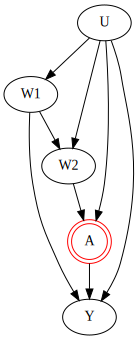

In [ ]:
import graphviz as gr

g = gr.Digraph()
g.edge("U", "W1")
g.edge("U", "W2")
g.edge("U", "A")
g.edge("U", "Y")

g.edge("W1", "W2")
g.edge("W2", "A")
g.edge("W1", "Y")
g.edge("A", "Y")
g.node("A", color="red", shape="doublecircle")
g

### Ceate a SCM

Given the DAG, we can build the related structural model M:

- Endogenous Nodes: $X = (W_1, W_2, A, Y )$
- Exogenous (Unmeasured) Nodes: $U = (U_{W1}, U_{W2}, U_A, U_Y ) \sim \mathbb{P}_U$
- Structural Equations $F$

\begin{align*}
F := & \\
     &W_1 = f_{W1}(U_{W1}) \\
     &W_2 = f_{W2}(W_1, U_{W2}) \\ 
     &A = f_A(W_1, W_2, U_A) \\
     &Y = f_Y (W_1, A, U_Y ) 
\end{align*}

We specified a model which reflects our limited knowledge of the data generating system. 
We did not place any assumptions on the joint distribution of the exogenous nodes. We made only one exclusion restriction on $W_2$ to $A$. 
Finally, we did not make any assumptions about the functional form of the structural equations.

### Causal Analysis

Our target causal parameter is the average treatment effect (ATE), defined in this case as:

\begin{align*}
ATE &= \mathbb{E}_{U,X} (Y_1) - \mathbb{E}_{U,X} (Y_0) \\
        & = \mathbb{E}_{U,X} [f_Y(W_1,A=1,U_Y)] - \mathbb{E}_{U,X} [f_Y(W_1,A=0,U_Y)]
\end{align*}

This is the difference in the expected counterfactual happiness if all wizards were to drink butterbeer and the expected counterfactual happiness if all wizards were not to drink butterbeer.

### Analytical Analysis

Because we (clearly) don't have real data on this study we need to generate a dataset.  
We consider a particular data generating process $\mathbb{P}_{U,X}$,  **one** of many compatible with M. We also specify the structural equations $F$. 

- Each of the exogenous factors $U$ is drawn independently from the following distributions:

$\begin{align*}
    U_{W1} \sim Uniform(min=0, max=1) \\
    U_{W2} \sim Bernoulli(p=0.5) \\
    U_{A} \sim Normal(\mu=-3, \sigma^2=1) \\
    U_{Y} \sim Normal(\mu=0, \sigma^2=0.3^2)
\end{align*}$

- Let us also specify the structural equations $F$:

$\begin{align*}
     &W_1 = f_{W1}(U_{W1}) = \mathbb{I}[U_{W1} < 0.35] \\
     &W_2 = f_{W2}(W_1, U_{W2}) = W_1 + 2U_{W2} \\ 
     &A = f_A(W_1, W_2, U_A) = \mathbb{I} [(1+W_1+2W_2+U_A) > 0]\\
     &Y = f_Y (W_1, A, U_Y )  = 1+2.5A + 3W_1 -0.25A  W_1 + U_y
\end{align*}$

where $\mathbb{I}$ is the indicator function and equal to 1 if the statement in the brackets is true.



In this particular data generating system (one of many compatible with the SCM), the expectation of the counterfactual outcome is a linear function of the treatment level $a$:

$\begin{align*}
\mathbb{E}_{U,X}[Y_a] &= \mathbb{E}_{U,X}[1+2.5a + 3W_1 -0.25a  W_1 + U_y]  \\ 
&= 1+2.5a + 3\mathbb{E}_{U,X}[W_1] -0.25a \mathbb{E}_{U,X}[W_1] + \mathbb{E}_{U,X}[U_y] \\
&= 1+2.5a + 3 \underbrace{\mathbb{E}_{U,X}[W_1]}_{0.35} -0.25a \underbrace{\mathbb{E}_{U,X}[W_1]}_{0.35} + \underbrace{\mathbb{E}_{U,X}[U_y]}_{0}
\end{align*}$

This comes from the fact that $W_1$ is a Bernoulli random variable with probability 0.35.

$\mathbb{E}[W_1] = 1P(W_1=1) + 0P(W_1=0)$ and $P(W_1=0) = P(\mathbb{I}(U_W <0.35)) = P(U_W < 0.35) = 0.35$.


#### Average Treatment Effect (ATE): 

Therefore, the true value of the target causal parameter is:

$ATE = \mathbb{E}(Y(a=1) - Y(a=0)) = (1 + 2.5*1 + 3∗0.35 − 0.25∗1∗0.35 + 0) − (1 + 2.5∗0 + 3∗0.35 − 0.25∗0∗0.35 + 0)= 2.4125$

The counterfactual expected happiness would be 2.4125 units higher if all wizards consumed butterbeer than if none of the wizards consumed butterbee

### Simulations

Let's simulate some data...

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

seed = 42
random.seed(seed)
np.random.seed(seed)

n_students = 5000

"""Simulate the background factor"""

#Exogenous variables
Uw1 = np.random.uniform(low=0, high=1, size=n_students)
Uw2 = np.random.binomial(n=1, p=0.5, size=n_students)
Ua = np.random.normal(loc=-3, scale=1, size=n_students)
Uy = np.random.normal(loc=0, scale=0.3, size=n_students)

#Endogenous variables
W1 = (Uw1 <= 0.35).astype(int)
W2 = W1 + 2*Uw2
A = (((1+W1+2*W2+Ua)) >= 0).astype(int)
Y = 1 + 2.5*A + 3*W1 - 0.25*A*W1 + Uy


# Store everything in a dataframe
data = pd.DataFrame(data = 
                    {'W1': W1,
                     'W2': W2,
                     'A': A,
                     'Y': Y})

data.head()

,W1,W2,A,Y
0,0,0,0,0.804414
1,0,0,0,0.969992
2,0,2,1,3.944055
3,0,0,0,1.152629
4,1,3,1,5.761524


Now intervene to generate the counterfactual outcomes

In [ ]:
# Interven on the butterbeer consumption
A = 1; Y1 = 1 + 2.5*A + 3*W1 - 0.25*A*W1 + Uy
A = 0; Y0 = 1 + 2.5*A + 3*W1 - 0.25*A*W1 + Uy
# Store results
data['Y1'] = Y1
data['Y0'] = Y0
data.head()

,W1,W2,A,Y,Y1,Y0
0,0,0,0,0.804414,3.304414,0.804414
1,0,0,0,0.969992,3.469992,0.969992
2,0,2,1,3.944055,3.944055,1.444055
3,0,0,0,1.152629,3.652629,1.152629
4,1,3,1,5.761524,5.761524,3.511524


We notice that the outcome $Y$ when $A=0$ is equal to the counterfactual outcome $Y0$. Likewise, the outcome $Y$ when $A=1$ is equal to the counterfactual outcome $Y1$.
Given input of the background factors $U$, the structural equations are deterministic.

In [ ]:
ATE = (data['Y1'] - data['Y0']).mean()
ATE

2.41145

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e9f789e8-0475-4790-a085-15ec7f70f6c3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>